In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
import networkx as nx

In [0]:
df_sinasc_es_2016 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSkaN1Ye-7puUZMT3J_yuJisowxrmsU3BAsvyfI3ZxD_mKPJ_4fjfnUS9_JH83fAocKWjyRquGMJxde/pub?output=csv')
df_sim_es_2016 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR_MH3HjwGWD0icAnZ3LVxxKUIxYNgAE3R-m-P61g0T2iXE9bs3hjeItGKTJqIUslIOAFN7TrE2ghGM/pub?output=csv')

In [0]:
df_mortalidade_infantil = pd.merge(df_sinasc_es_2016, df_sim_es_2016, how='inner', on = 'NUMERODN')

In [0]:
dic_cids = {}
dic_cids_frequencia = {}
colunas_linhas = ['LINHAA','LINHAB','LINHAC','LINHAD','LINHAII']

for index, row in df_mortalidade_infantil.iterrows():
  for cid in str(row['CAUSABAS']).split('*'):
    if cid in dic_cids_frequencia:
      dic_cids_frequencia[cid] += 1
    else:
      dic_cids_frequencia[cid] = 1
    if cid != '' and cid != 'nan':
      if cid in dic_cids:
        for linha in colunas_linhas:
          for cid_l in str(row[linha]).split('*'):
            if cid_l != '' and cid_l != 'nan':
              if cid_l in dic_cids[cid]:
                dic_cids[cid][cid_l] +=1
              else:
                dic_cids[cid][cid_l] = 1
      else:
        dic_cids[cid] = {}
        for linha in colunas_linhas:
          for cid_l in str(row[linha]).split('*'):
              if cid_l != '' and cid_l != 'nan':
                dic_cids[cid][cid_l] = 1

In [0]:
dic_cids

{'A09': {'A09X': 2, 'A419': 1, 'E43X': 1, 'E86X': 1, 'J80X': 2, 'N179': 1},
 'A419': {'A419': 1, 'D65X': 1, 'Q723': 1},
 'J159': {'A419': 1, 'J159': 1, 'R092': 1, 'R579': 1},
 'J180': {'J180': 2},
 'J189': {'A419': 1, 'D689': 1, 'J189': 1, 'J960': 1},
 'N10': {'A419': 1, 'N10X': 1},
 'N179': {'N179': 1, 'P073': 1, 'P220': 1},
 'N390': {'A419': 1, 'N390': 1, 'R092': 1},
 'P000': {'A419': 1,
  'A509': 1,
  'P000': 22,
  'P002': 1,
  'P008': 1,
  'P015': 1,
  'P021': 2,
  'P059': 1,
  'P071': 1,
  'P072': 11,
  'P073': 6,
  'P209': 1,
  'P219': 3,
  'P220': 8,
  'P248': 1,
  'P261': 2,
  'P269': 4,
  'P285': 1,
  'P293': 1,
  'P298': 1,
  'P369': 9,
  'P60X': 1,
  'P700': 1,
  'P77X': 1},
 'P001': {'P000': 1,
  'P001': 8,
  'P002': 1,
  'P003': 1,
  'P008': 1,
  'P011': 1,
  'P071': 1,
  'P072': 2,
  'P073': 1,
  'P219': 2,
  'P220': 2,
  'P285': 1,
  'P369': 5,
  'P744': 1,
  'Q620': 1},
 'P002': {'A509': 5,
  'I313': 1,
  'P001': 1,
  'P002': 9,
  'P011': 1,
  'P042': 1,
  'P043': 1,
  

In [0]:
G = nx.Graph(dic_cids)

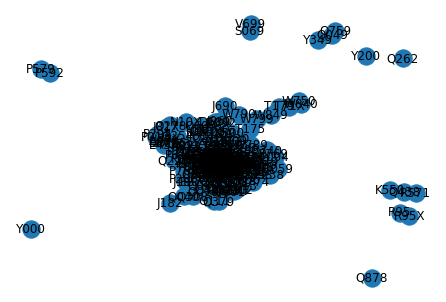

In [0]:
nx.draw(G,with_labels = True)

from google.colab import files
plt.show()

In [0]:
G=nx.Graph()

for k,v in dic_cids.items():
  for x,y in v.items():
    print(k,x,y)
    G.add_edge(k,x,length = y)
                

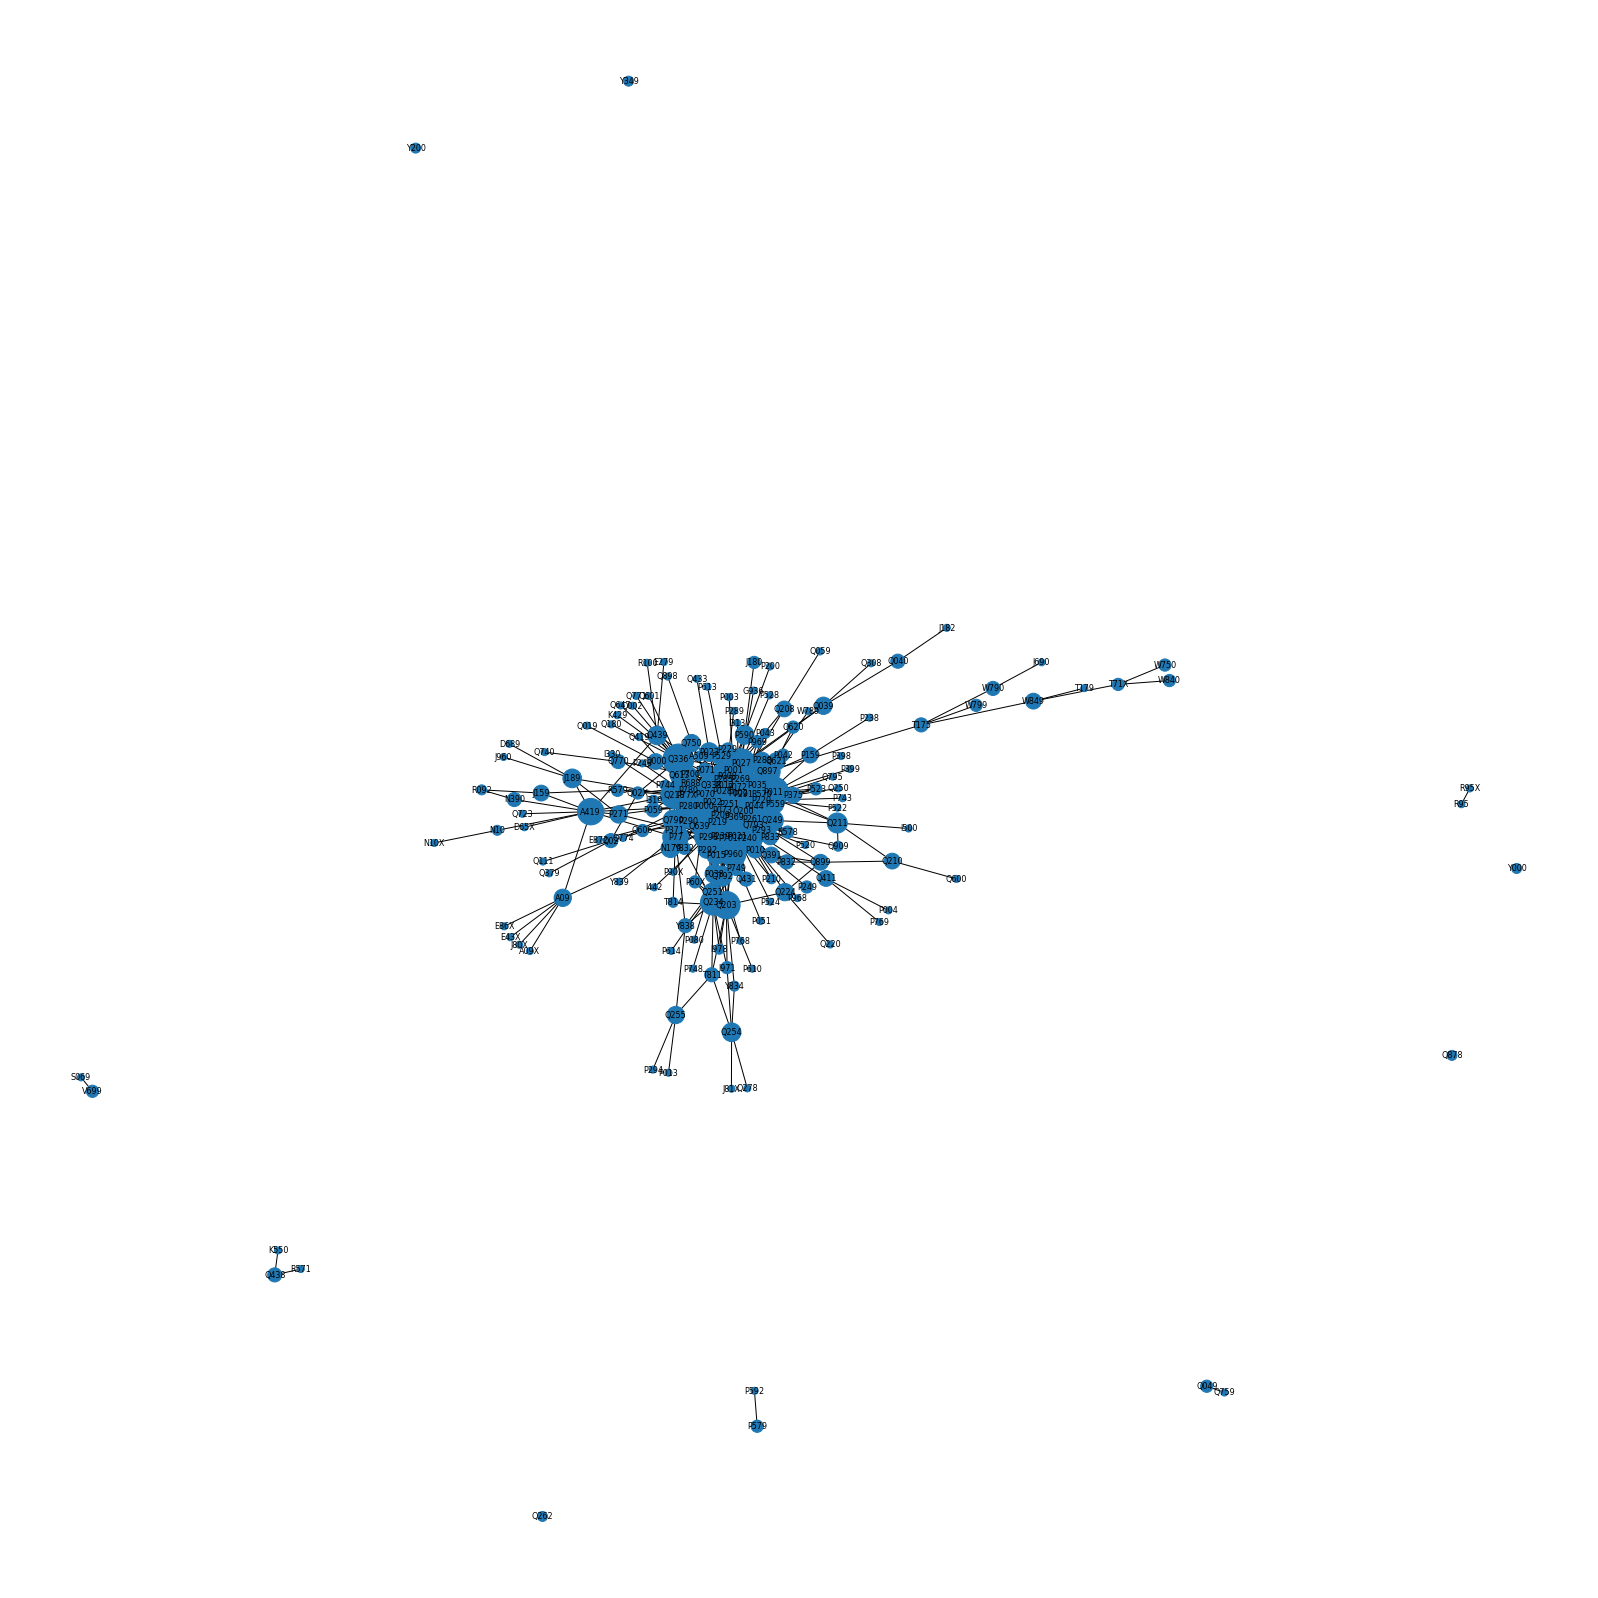

In [0]:
#G = nx.Graph(dic_cids)
d = nx.degree(G)

pos = nx.kamada_kawai_layout(G)

plt.figure(1,figsize=(22,22)) 
#nx.draw(G, pos, with_labels=True, font_size = 8, node_size=[v * 50 for k,v in d])
nx.draw(G, with_labels=True, font_size = 8, node_size=[v * 50 for k,v in d])


#nx.draw_networkx_nodes(G, layout, nodelist=dic_cids.keys(), node_color='#cccccc', node_size=[v * 50 for k,v in d])

#nx.draw_networkx_edges(G, layout, width=1, edge_color="#cccccc")

#nx.draw_networkx_labels(G, layout, labels=dic_cids)
#from google.colab import files
#plt.savefig("cids.pdf")
#files.download("cids.pdf") 
plt.axis('off')
plt.show()



In [0]:
G.degree()

DegreeView({'P209': 12, 'P960': 13, 'P90X': 1, 'P285': 19, 'P293': 10, 'P240': 19, 'W750': 3, 'T71X': 3, 'P369': 47, 'P220': 30, 'P249': 3, 'P291': 11, 'R688': 4, 'P219': 25, 'P210': 2, 'P073': 39, 'P968': 1, 'P298': 14, 'P749': 4, 'P280': 10, 'P072': 32, 'Q774': 1, 'P071': 4, 'P070': 15, 'P743': 1, 'Q250': 1, 'P522': 1, 'P523': 3, 'P261': 9, 'Q795': 1, 'P251': 8, 'Q793': 9, 'R578': 3, 'P044': 10, 'P271': 6, 'A419': 14, 'J189': 7, 'P059': 4, 'D65X': 1, 'Q723': 1, 'P000': 30, 'P269': 10, 'P008': 8, 'P700': 4, 'P002': 26, 'A509': 2, 'P248': 1, 'P60X': 3, 'P77X': 6, 'P021': 15, 'P015': 7, 'P012': 19, 'P289': 1, 'P292': 6, 'R570': 6, 'P001': 18, 'I313': 1, 'P011': 20, 'P239': 8, 'P042': 3, 'P043': 2, 'Q251': 6, 'P614': 1, 'Q039': 6, 'Q040': 4, 'Q308': 1, 'Q620': 3, 'P780': 8, 'I319': 2, 'Q419': 1, 'Q210': 5, 'Q899': 5, 'Q600': 1, 'Q897': 14, 'T175': 4, 'W789': 1, 'P529': 7, 'P613': 1, 'Q770': 4, 'Q740': 1, 'Q411': 5, 'P769': 1, 'P004': 1, 'R579': 3, 'Q234': 13, 'T811': 4, 'I971': 3, 'Y832'

In [0]:
df_cids_frequencia = pd.DataFrame.from_dict(dic_cids_frequencia, orient='index', columns=['FREQUENCIA'])

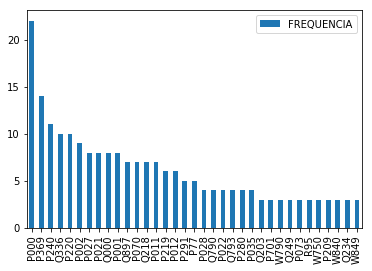

In [0]:
df_cids_frequencia.sort_values(['FREQUENCIA'], ascending=False).head(35).plot(kind= 'bar')

In [0]:
df_cids_frequencia.sort_values(['FREQUENCIA'], ascending=False)

,FREQUENCIA
P000,22
P369,14
P240,11
Q336,10
P220,10
P002,9
P027,8
P021,8
Q000,8
P001,8
